In [370]:
import pandas as pd


In [371]:
df = pd.DataFrame()


In [372]:
df["Outlook"] =['sunny','sunny','overcast','rainy','rainy','rainy','overcast','sunny','sunny','rainy','sunny','overcast','overcast','rainy']

In [373]:
df['Temperature']=['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild']

In [23]:
df['Humidity']=['high','high','high','high','normal','normal','normal','high','normal','normal','normal','high','normal','high']

In [24]:
df["Windy"]=['false','true','false','false','false','true','true','false','false','false','true','true','false','true']


In [25]:
df["Play"]=['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']

In [33]:
df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
2,overcast,hot,high,false,yes
3,rainy,mild,high,false,yes
4,rainy,cool,normal,false,yes
5,rainy,cool,normal,true,no
6,overcast,cool,normal,true,yes
7,sunny,mild,high,false,no
8,sunny,cool,normal,false,yes
9,rainy,mild,normal,false,yes


In [36]:
df.iloc[:,:-1]

,Outlook,Temperature,Humidity,Windy
0,sunny,hot,high,false
1,sunny,hot,high,true
2,overcast,hot,high,false
3,rainy,mild,high,false
4,rainy,cool,normal,false
5,rainy,cool,normal,true
6,overcast,cool,normal,true
7,sunny,mild,high,false
8,sunny,cool,normal,false
9,rainy,mild,normal,false


In [39]:
encoded_df =pd.get_dummies(df.iloc[:,:-1],dtype=int)
encoded_df['Play'] = df['Play']
encoded_df

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true,Play
0,0,0,1,0,1,0,1,0,1,0,no
1,0,0,1,0,1,0,1,0,0,1,no
2,1,0,0,0,1,0,1,0,1,0,yes
3,0,1,0,0,0,1,1,0,1,0,yes
4,0,1,0,1,0,0,0,1,1,0,yes
5,0,1,0,1,0,0,0,1,0,1,no
6,1,0,0,1,0,0,0,1,0,1,yes
7,0,0,1,0,0,1,1,0,1,0,no
8,0,0,1,1,0,0,0,1,1,0,yes
9,0,1,0,0,0,1,0,1,1,0,yes


In [277]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')

In [290]:
X = encoded_df.iloc[:,:-1]
X

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [291]:
y= encoded_df["Play"]
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object

In [412]:
from sklearn.model_selection import train_test_split

X_train,  X_test,y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=10)

In [413]:
training_data = pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test,y_test],axis=1)

In [414]:
training_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true,Play
2,1,0,0,0,1,0,1,0,1,0,yes
10,0,0,1,0,0,1,0,1,0,1,yes
5,0,1,0,1,0,0,0,1,0,1,no
11,1,0,0,0,0,1,1,0,0,1,yes
13,0,1,0,0,0,1,1,0,0,1,no
1,0,0,1,0,1,0,1,0,0,1,no
0,0,0,1,0,1,0,1,0,1,0,no
4,0,1,0,1,0,0,0,1,1,0,yes
9,0,1,0,0,0,1,0,1,1,0,yes


In [415]:
test_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true,Play
3,0,1,0,0,0,1,1,0,1,0,yes
7,0,0,1,0,0,1,1,0,1,0,no
12,1,0,0,0,1,0,0,1,1,0,yes
6,1,0,0,1,0,0,0,1,0,1,yes
8,0,0,1,1,0,0,0,1,1,0,yes


In [416]:
print("Shape of training data",training_data.shape)
print("Shape of test data",test_data.shape)

Shape of training data (9, 11)
Shape of test data (5, 11)


In [417]:

dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [418]:
y_pred = dt.predict(X_test)

In [419]:
print("Predicted labels: ", y_pred)
print("Actual labels: ", y_test.values)

Predicted labels:  ['no' 'no' 'yes' 'yes' 'yes']
Actual labels:  ['yes' 'no' 'yes' 'yes' 'yes']


In [420]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1, 0],
       [1, 3]], dtype=int64)

<Axes: >

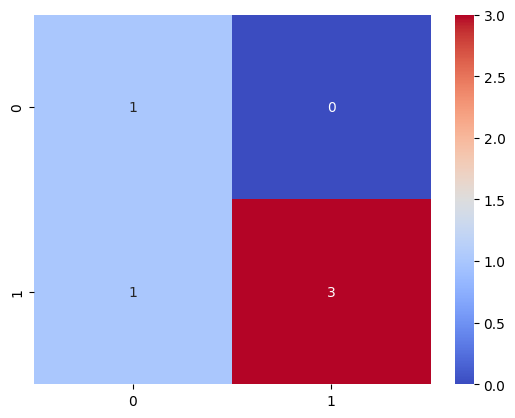

In [421]:
import seaborn as sns
sns.heatmap(conf_mat,cmap='coolwarm',annot=True)

In [422]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

          no       0.50      1.00      0.67         1
         yes       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5

